# Overview of Content:

### mlo_03_plot:


__Sections__:
- Main Module Import Section and Notebook Settings
- Initialize Custom Functions
- Read Notebook Variables
- Maua Loa Time Series
- ONI Time Series

    
__Plot and Save Figures__:
- Maua Loa Time Series:
    - raw_mmlo.pdf
    - trend_mmlo.pdf
    - notrend_mmlo.pdf
- ONI Time Series:
    - raw_oeni.pdf

## Main Module Import Section and Notebook Settings

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
from datetime import timedelta
import time
from scipy.fftpack import fft
from scipy import signal
import math
import matplotlib.pyplot as plt
%matplotlib notebook

plt.style.use('ggplot')
from matplotlib import rcParams
rcParams['lines.linewidth'] = 0.9
rcParams['figure.figsize'] = 9, 4.5
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%config InlineBackend.figure_format = 'retina'

import matplotlib

myred = '#E24A33'
myblue = '#348ABD'

## Read Notebook Variables

In [2]:
# read internal jupyter notebook variables

# stored via notebook: mlo_01_import.ipynb:
%store -r mmlo
%store -r oeni
%store -r eq_trend_mmlo
%store -r eq_trend_oeni

In [3]:
mmlo.tail()

,mmlo_data,mmlo_dec_date,mmlo_sea,mmlo_trend,mmlo_notrend
2017-02-28,406.42,2017.158904,405.61,404.529537,1.890463
2017-03-31,407.18,2017.243721,405.61,404.722266,2.457734
2017-04-30,409.00,2017.325913,406.11,404.909201,4.090799
2017-05-31,409.65,2017.410845,406.26,405.102547,4.547453
2017-06-30,408.84,2017.493037,406.56,405.289828,3.550172


## Maua Loa Time Series

<IPython.core.display.Javascript object>


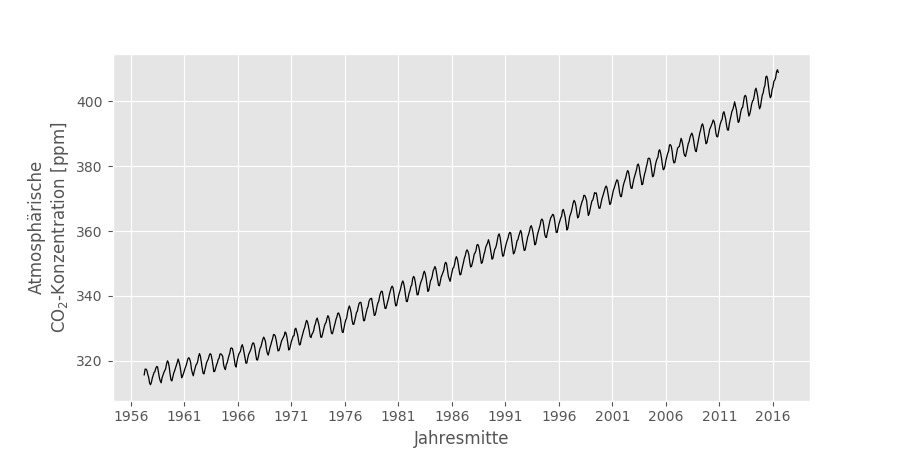

([<matplotlib.axis.XTick at 0x11a39aac8>,
 <a list of 13 Text xticklabel objects>)

In [4]:
fig = plt.figure()
plt.plot(mmlo.mmlo_data, color='k')
plt.xticks(pd.date_range(start='1956', end='2021', freq='5A'))
plt.ylabel('Atmosphärische\nCO$_2$-Konzentration [ppm]')
plt.xlabel('Jahresmitte')
plt.savefig('plots/raw_mmlo.pdf')

#### Variable Time Axis for Zooming in

<IPython.core.display.Javascript object>


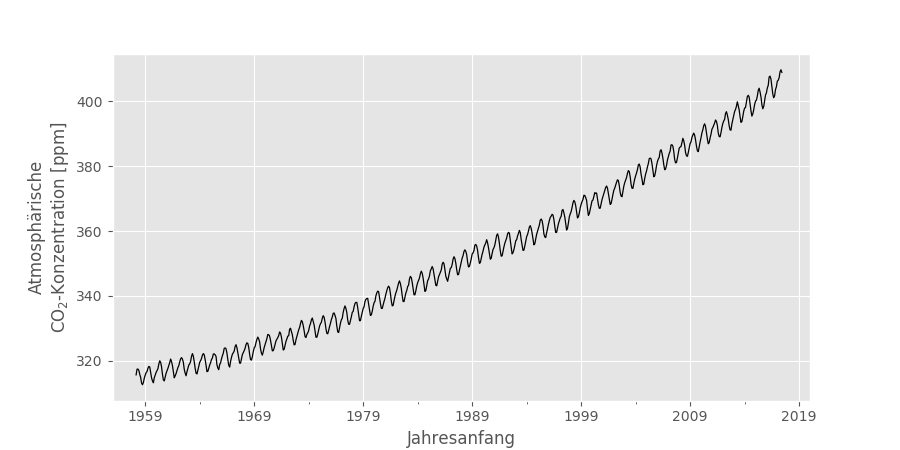

In [5]:
x_start = '1956'
x_stop = '2020'
ax = mmlo.plot(y='mmlo_data', legend=False, color='k', xlim=[x_start, x_stop])
ax.set_ylabel('Atmosphärische\nCO$_2$-Konzentration [ppm]')
ax.set_xlabel('Jahresanfang')
# plt.savefig('plots/raw_mmlo.pdf')

### Mauna Loa Monthly Mean with Trend

<IPython.core.display.Javascript object>


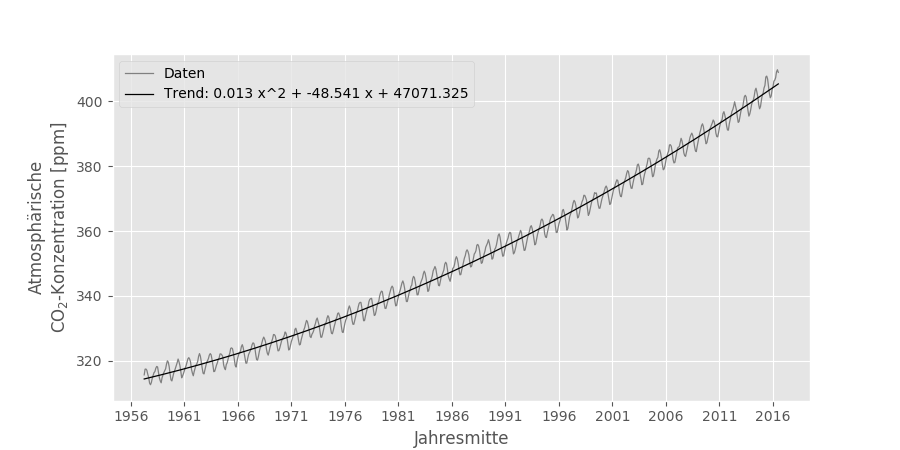

([<matplotlib.axis.XTick at 0x11a865128>,
 <a list of 13 Text xticklabel objects>)

In [6]:
x_start = '1956'
x_stop = '2021'
eq_label = 'Trend: ' + eq_trend_mmlo

fig = plt.figure()
plt.plot(mmlo.mmlo_data, color='grey', label='Daten')
plt.plot(mmlo.mmlo_trend, color='k', label=eq_label)
plt.xticks(pd.date_range(start=x_start, end=x_stop, freq='5A'))
plt.ylabel('Atmosphärische\nCO$_2$-Konzentration [ppm]')
plt.xlabel('Jahresmitte')
plt.legend()
plt.savefig('plots/trend_mmlo.pdf')

#### Variable Time Axis for Zooming in

<IPython.core.display.Javascript object>


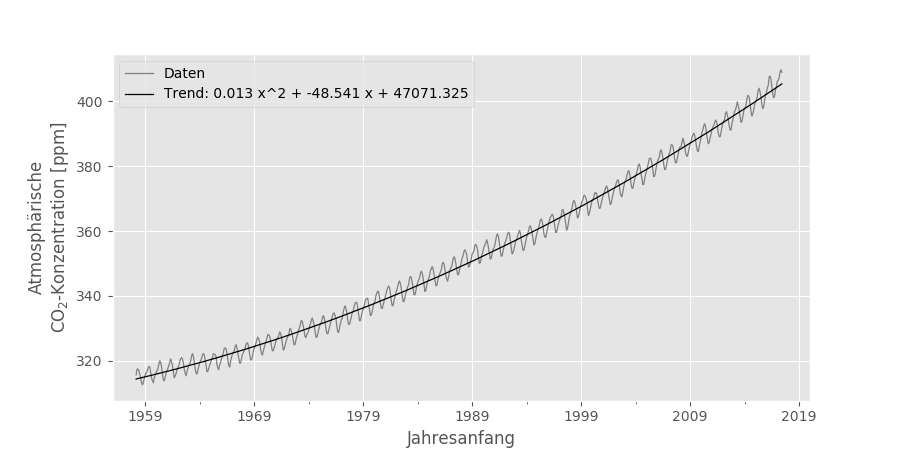

In [7]:
x_start = '1956'
x_stop = '2020'
eq_label = 'Trend: ' + eq_trend_mmlo
ax = mmlo.plot(y='mmlo_data', label='Daten', color='grey', xlim=[x_start, x_stop])
mmlo.plot(y='mmlo_trend', ax=ax, label=eq_label, color='k', xlim=[x_start, x_stop])
ax.set_ylabel('Atmosphärische\nCO$_2$-Konzentration [ppm]')
ax.set_xlabel('Jahresanfang')
# plt.savefig('plots/trend_mmlo.pdf')

### Detrended Mauna Loa Data

<IPython.core.display.Javascript object>


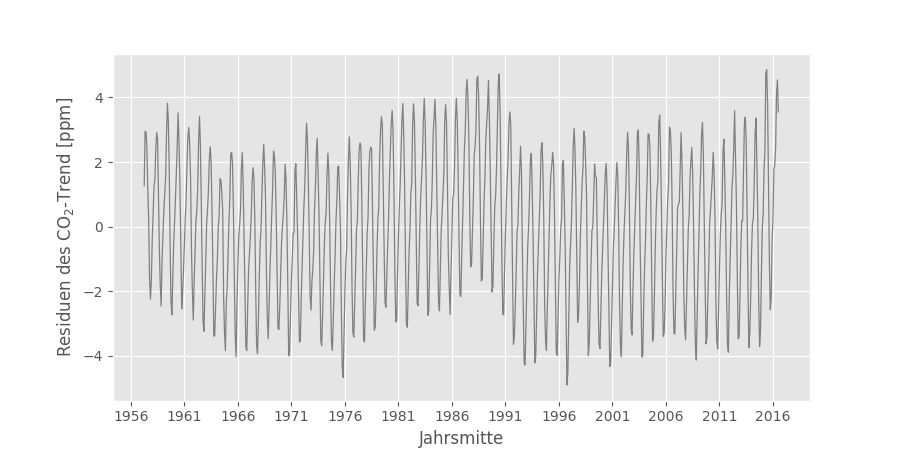

In [8]:
fig, ax = plt.subplots()
ax.plot(mmlo.index.values, mmlo.mmlo_notrend.values, label='Trendbereinigte Monatsmittel', color='grey')
ax.set_ylabel('Residuen des CO$_2$-Trend [ppm]')
ax.set_xlabel('Jahrsmitte')
ax.set_xticks(pd.date_range(start='1956', end='2021', freq='5A'))
plt.savefig('plots/notrend_mmlo.pdf')

## ONI Time Series

<IPython.core.display.Javascript object>


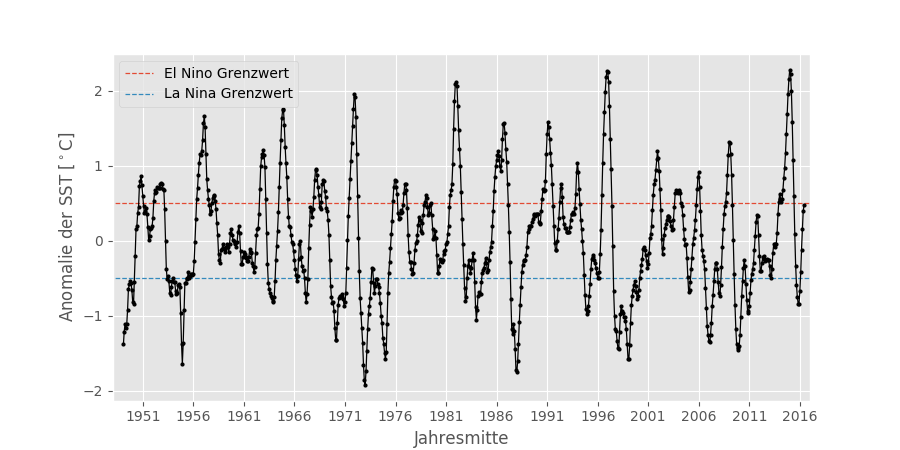

([<matplotlib.axis.XTick at 0x11ab1f828>,
 <a list of 15 Text xticklabel objects>)

(711493.0, 736695.0)

In [9]:
fig = plt.figure()
x_ax = pd.date_range(start='1946', end='2021', freq='5A')
plt.plot(oeni.oeni_data, '.-', markersize=4, color='k', label='')
plt.xticks(x_ax)
plt.ylabel('Anomalie der SST [$^\circ$C]')
plt.xlabel('Jahresmitte')
plt.hlines(0.5, '1946', '2020', linestyles='dashed', colors=myred, label='El Nino Grenzwert')
plt.xlim('1949', '2018')
plt.hlines(-0.5, '1946', '2020', linestyles='dashed', colors=myblue, label='La Nina Grenzwert')
plt.legend()
plt.savefig('plots/raw_oeni.pdf')

#### Variable Time Axis for Zooming in

<IPython.core.display.Javascript object>


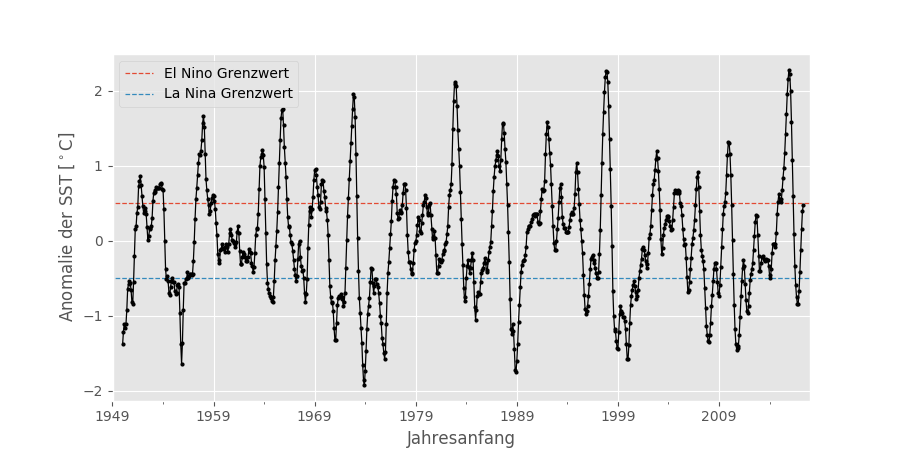

(-252, 576)

In [10]:
x_start = '1946'
x_stop = '2020'
ax = oeni.plot(y='oeni_data', legend=False, style='.-', markersize=4, color='k', xlim=[x_start, x_stop], label='')
ax.set_ylabel('Anomalie der SST [$^\circ$C]')
ax.set_xlabel('Jahresanfang')
plt.hlines(0.5, '1946', '2020', linestyles='dashed', colors=myred, label='El Nino Grenzwert')
plt.xlim('1949', '2018')
plt.hlines(-0.5, '1946', '2020', linestyles='dashed', colors=myblue, label='La Nina Grenzwert')
plt.legend()